**Author: Andrew Bennett**  
**Final Project**  
**AAI 695 Fall Semester 2022**
**Due Date: 12/21/2022** 

This python cell represents all constants used for data processing, and bounds used for creating grids with the geographic region California

In [2]:
#represents constant.py
CA_MIN_LAT = 32.5121
CA_MAX_LAT = 42.0126
CA_MIN_LONG = -124.6509
CA_MAX_LONG = -114.1315
FIRE_CA = ["fire_ca_2013.csv", "fire_ca_2014.csv", "fire_ca_2015.csv", "fire_ca_2016.csv", "fire_ca_2017.csv",
           "fire_ca_2018.csv", "fire_ca_2019.csv", "fire_ca_2020.csv", "fire_ca_2021.csv", "fire_ca_2022.csv"]

WEATHER_FEATURE = ["eto", "precipitation", "solar_rad", "aver_vapor_press", "max_air_temp",
                   "min_air_temp", "aver_air_temp", "max_humidity", "min_humidity", "aver_humidity",
                   "dew_point", "aver_wind_speed", "wind_run", "soil_temp"]

START_DATE = '2013-01-01'
ACTIVE = 'Active'
HAS_FIRE = 'has_fire'
NAN = 0

CALIFORNIA_MAX_NUMBER_OF_GRIDS = 68

CALIFORNIA_ONE_DEGREE_GRIDS = [[42, 41, -126, -125],[41, 40, -126, -125],[42, 41, -125, -124],[41, 40, -125, -124],
[42, 41, -124, -123],[42, 41, -122, -120],[41, 40, -124, -123],[41, 40, -123, -122],
[42, 41, -122, -121],[40, 39, -122, -121],[42, 41, -121, -120],[40, 39, -121, -120],
[40, 39, -124, -123],[39, 38, -124, -123],[40, 39, -123, -122],[39, 38, -123, -122],
[40, 39, -122, -121],[39, 38, -122, -121],[40, 39, -121, -120],[39, 38, -121, -120],
[40, 39, -120, -119],[37, 36, -120, -119],[40, 39, -119, -118],[37, 36, -119, -118],
[38, 37, -124, -123],[37, 36, -124, -123],[38, 37, -123, -122],[37, 36, -123, -122],
[38, 37, -122, -121],[37, 36, -122, -121],[38, 37, -121, -120],[37, 36, -121, -120],
[38, 37, -120, -119],[37, 36, -120, -119],[38, 37, -119, -118],[37, 36, -119, -118],
[38, 37, -118, -117],[37, 36, -118, -117],[38, 37, -117, -116],[37, 36, -117, -116],
[36, 35, -122, -121],[35, 34, -122, -121],[36, 35, -121, -120],[35, 34, -121, -120],
[36, 35, -120, -119],[35, 34, -120, -119],[36, 35, -119, -118],[35, 34, -119, -118],
[36, 35, -118, -117],[35, 34, -118, -117],[36, 35, -117, -116],[35, 34, -117, -116],
[36, 35, -116, -115],[35, 34, -116, -115],[36, 35, -115, -114],[35, 34, -115, -114],
[34, 33, -120, -119],[33, 32, -120, -119],[34, 33, -119, -118],[33, 32, -119, -118],
[34, 33, -118, -117],[33, 32, -118, -117],[34, 33, -117, -116],[33, 32, -117, -116],
[34, 33, -116, -115],[33, 32, -116, -115],[34, 33, -115, -114],[33, 32, -115, -114]]

This python cell represents the structure chosen to represent a grid, with four corners and ID used for weather and fire mapping

In [6]:
class Grid:
    def __init__(self, grid_id, min_lat, max_lat, min_long, max_long):
        self.grid_id = grid_id
        self.min_lat = min_lat
        self.max_lat = max_lat
        self.min_long = min_long
        self.max_long = max_long

    def to_string(self):
        return str(self.grid_id) + ',' + str(self.min_lat) + ',' + str(self.max_lat) + ',' + str(
            self.min_long) + ',' + str(self.max_long)

This python cell represents a date range generator and type checking

In [7]:
from datetime import timedelta


def is_float(element):
    try:
        float(element)
        return True
    except ValueError:
        return False


def daterange(date1, date2):
    date_list = []
    for n in range(int((date2 - date1).days) + 1):
        date_list.append(date1 + timedelta(n))
    return date_list

This python cell contains two different method for determining distances from a point in a Geodetic system

In [ ]:
import math as Math
import numpy as np
import pandas

#meters geodetic 1984 radius
RadiusWgs1984 = 6356752.3142

DegreesToRadians = Math.pi/180.0
RadiansToDegrees = 180/Math.pi

class GeoSpatial:

    @staticmethod
    def haversine(lat1: float, lon1: float, lat2: float, lon2: float):
        phi1 = lat1 * DegreesToRadians
        phi2 = lat2 * DegreesToRadians
        deltaPhi = (lat2-lat1) * DegreesToRadians
        deltaLamba = (lon2-lon1) * DegreesToRadians
        a = Math.sin(deltaPhi/2) * Math.sin(deltaPhi/2) + Math.cos(phi1) * Math.cos(phi2) *  Math.sin(deltaLamba/2) * Math.sin(deltaLamba/2)
        c = Math.atan2(Math.sqrt(a), Math.sqrt(1-a))
        d = RadiusWgs1984 * c        
        return d

    @staticmethod
    def equirectanglurProjection(lat1: float, lon1: float, lat2: float, lon2: float):      
        phi1 = lat1 * DegreesToRadians
        phi2 = lat2 * DegreesToRadians  	
        lamba1 = lon1 * DegreesToRadians
        lamba2 = lon2 * DegreesToRadians  
        x = (lamba2-lamba1) * Math.cos((phi1+phi2)/2)
        y = (phi2-phi1)
        d = Math.sqrt(x*x + y*y) * RadiusWgs1984
        return d

In [4]:
#Setup of namespaces and written python files for final project
import os
#Sklearn 
import sklearn
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as preproces
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

#arrays and data extractors
import numpy as np
import pandas as pd
import geopandas as gpd

#Time
from datetime import datetime, date

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

#UpSampling
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.utils import resample

#constants
import sys
# sys.path.insert(0,'D:\\MastersAI\Stevens\\AppliedMachineLearning\\CPE_695WS\FinalProject\\mainBranch\\wildfire\\source_code\\data_generation')
# import constant 

#models
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
#Seed
np.random.seed(42)

Performance metrics, utilized for evaluating classifiers while prediction fires.  Recall and Accuracy were used to evaluated the negative and positive outcomes of predictions

In [1]:
class MLHelper:   
    @staticmethod
    def AccuracyPrediction(predictions, y_test, classifierName = 'classifier'):
        TP = ((predictions == 1) & (y_test == 1)).sum()
        FP = ((predictions == 1) & (y_test == 0)).sum()
        TN = ((predictions == 0) & (y_test == 0)).sum()
        FN = ((predictions == 0) & (y_test == 1)).sum()
        #accuracy is called precision for classifiers
        # precision = TP/(TP + FP) for true
        # precision = FN/(TN + FN) for false
        print(f'{classifierName} TP:{TP}, FP:{FP}, TN:{TN}, FN:{FN}')

        if((FN == 0 and FP == 0) or (TN == 0 and FN == 0)):
            return

        #percent Fire correctly predicted (on test set)
        precisionForFire = TP/(TP + FP)
        print(f'{classifierName} accuracy for Fire', precisionForFire)
        #percent NoFire correctly predicted (on test set)
        precisionForNoFire = TN/(TN + FN)
        print(f'{classifierName} accuracy for NoFire', precisionForNoFire)
        accuracyOverall = accuracy_score(y_test, predictions)
        print(f'{classifierName} accuracy', accuracyOverall)

Plot all fires from 2013-2022

C:\Users\Crow\AppData\Local\Temp\ipykernel_6664\1760312466.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Crow\AppData\Local\Temp\ipykernel_6664\1760312466.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


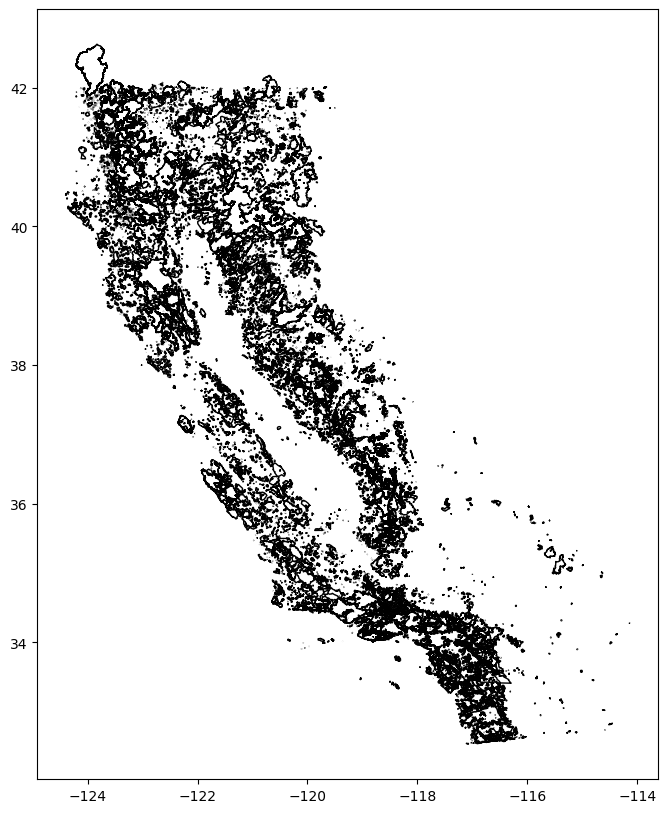

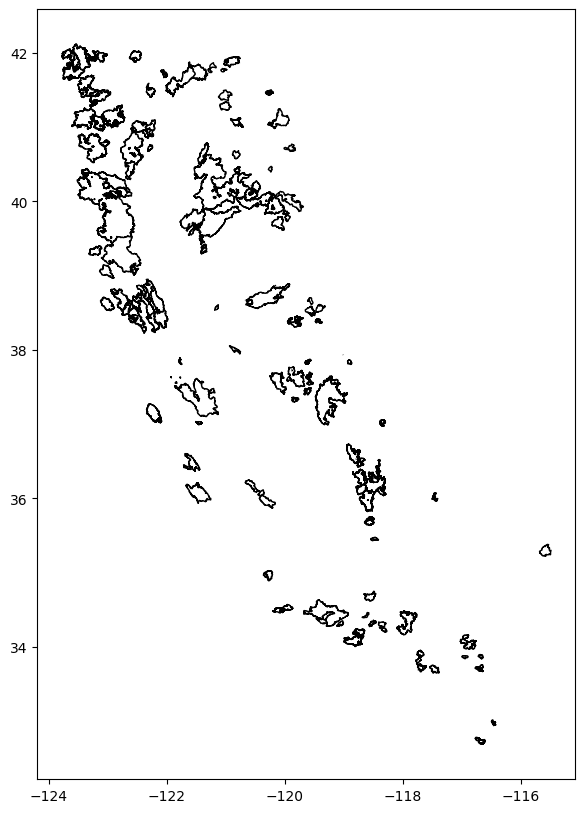

In [3]:
#All Fires
df = gpd.read_file('D:\\MastersAI\\Stevens\\AppliedMachineLearning\\CPE_695WS\\FinalProject\\SpatialData\\California_Fire_Perimeters_(all).geojson')

fig, ax = plt.subplots(figsize=(10,10))
df.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})

fig.show()

#Large Fires only
df = gpd.read_file('D:\\MastersAI\\Stevens\\AppliedMachineLearning\\CPE_695WS\\FinalProject\\SpatialData\\California_Fire_Perimeters_large.geojson')

fig, ax = plt.subplots(figsize=(10,10))
df.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})

fig.show()

This python cell represents the visilization of all weather stations

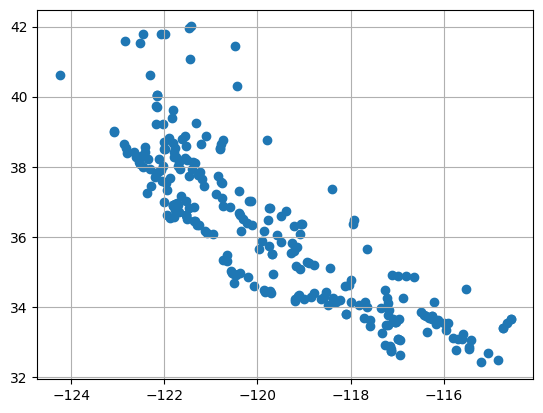

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

#File Naming conventions
# weatherData naming convention YYYYdaily{StationID}
# StationID = ###

#DAILY Default Order of Data Columns:
#  A   1.  	Station Id
#  B   2. 	Date
#  C   3. 	Julian Date
#  D   4.  	Reference ETo   (in)   (mm)       
#  F   6.  	Precipitation   (in)   (mm)      
#  H   8.  	Solar Radiation Average   (Ly/day)   (W/m²)
#  J   10. 	Average Vapor Pressure   (mBars)   (kPa)
#  L   12. 	Maximum Air Temperature   (°F)   (°C)
#  N   14. 	Minimum Air Temperature   (°F)   (°C)
#  P   16. 	Average Air Temperature   (°F)   (°C)
#  R   18. 	Maximum Relative Humidity   (%)
#  T   20. 	Minimum Relative Humidity   (%)
#  V   22. 	Average Relative Humidity   (%)
#  X   24. 	Dew Point   (°F)   (°C)
#  Z   26. 	Average Wind Speed   (mph)   (m/s)
#  AB  28. 	Wind Run   (miles)   (km)
#  AD  30. 	Average Soil Temperature   (°F)   (°C)

Indices = [0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
ColumnNames = ['StationId','Date','JulianDate','Eto','Precipitation','SolarRadiation','VaporPressure','MaxAirTemp','MinAirTemp','AvgAirTemp',
                'MaxRelHumidity','MinRelHumidity', 'AvgRelHumidity', 'DewPoint', 'AvgWindSpeed', 'AvgSoilTemp']

Latitudes = [36.814000,36.336222,36.881000,36.972000,35.532695,38.535794,36.851248,40.044065,35.238000,35.077222,35.160000,
39.608639,38.752307,39.739000,36.158138,36.905000,32.846000,33.077000,36.768256,36.040000,35.867750,36.490000,36.174000,
33.631000,33.764000,35.505000,38.808000,36.447000,36.516000,38.870600,35.703000,39.226861,36.301000,33.489000,37.358606,
33.655000,36.620000,34.954000,36.597481,36.683000,33.043151,38.109000,41.063767,33.964942,32.787000,41.792000,37.928154,
42.003000,33.256000,33.646000,38.662000,35.305442,36.341000,35.649861,33.730000,37.097450,40.289799,34.302000,35.114000,
34.903000,39.691782,33.486650,38.121000,34.583144,37.914000,32.733000,34.432000,32.759575,37.326000,37.834822,37.645222,
33.388000,34.147000,33.090000,33.688450,34.924000,38.428475,34.056589,38.549000,36.820833,38.523000,34.130000,38.403550,
39.252561,39.006747,36.360647,32.806183,34.942525,36.609444,41.438214,41.958869,37.231861,35.286000,34.471579,36.886000,
37.453000,34.173000,33.049000,34.044311,37.525000,34.402222,33.797000,38.526822,36.997831,36.634028,38.982737,34.437352,
40.043000,38.219503,34.840000,36.943964,36.079000,36.121275,36.347415,36.515000,36.716806,34.475914,33.841387,38.495000,
34.962000,38.415564,38.283047,38.233972,36.890096,35.205810,36.854875,33.327703,33.220186,36.902778,33.556000,38.649964,
37.151534,34.196531,34.884267,33.662869,33.523694,33.558017,35.603513,38.501258,38.121739,33.536894,36.721083,36.822926,
38.266428,37.016528,35.505833,32.628208,37.314139,37.780653,32.885847,33.532222,34.219386,33.081050,33.549000,38.599158,
34.233639,37.995478,38.419439,34.146372,35.335267,37.438944,33.746000,35.472556,38.312000,34.841878,38.129641,37.725881,
37.552922,36.082272,38.015372,37.598758,35.734000,32.901867,33.798697,33.383070,33.686000,36.900000,37.837614,33.663325,
33.124000,33.080733,35.833059,36.488468,32.729480,32.411000,32.492658,38.090933,37.016760,36.358628,36.382028,37.663969,
34.255980,36.633240,37.720739,38.887603,38.691786,34.614981,34.324639,34.237645,33.748586,32.674353,35.028281,35.862569,
34.426361,36.175833,37.545869,33.268447,33.678151,36.913166,36.540942,37.015026,38.277972,37.931547,36.625626,34.291331,
34.256150,34.269031,33.595736,34.214197,34.592310,34.513611,40.028778,34.142911,40.625499,41.577778,38.672722,38.508333,
38.636111,36.570101,34.405556,34.672222,34.913472,34.138104,34.883472,38.797944,41.802476,33.552810,33.899914,33.664747,
33.756308,33.462405,38.192386,38.249622,39.386632,33.621667,38.773409,38.033386,37.932180,37.755597,39.210667,34.112042,
36.456728,37.255333,37.718167,33.985350,34.759475,35.659128,36.376917,40.604467,41.798331,41.533989]

Longitudes =[-119.732000,-120.112906,-121.793000,-121.726000,-119.281862,-121.776385,-120.590980,-122.165408,-118.894000,
-119.082211,-119.181000,-121.824431,-120.733870,-122.171000,-119.851408,-121.703000,-115.448000,-115.614000,-121.773772,
-119.573000,-119.894900,-119.779000,-121.117000,-116.112000,-116.424000,-119.690000,-121.908000,-121.364000,-120.314000,
-121.546075,-119.152000,-122.024800,-119.223000,-117.199000,-118.405471,-114.558000,-121.545000,-120.384000,-119.504120,
-120.387000,-115.415835,-121.346000,-121.456019,-117.336983,-117.135000,-122.064000,-121.659730,-121.427000,-117.320000,
-116.242000,-122.866000,-120.661783,-121.257000,-119.959300,-116.382000,-120.754227,-120.433948,-119.119000,-118.439000,
-117.115000,-122.153481,-117.228269,-122.543000,-120.079239,-122.082000,-117.135000,-119.839000,-115.732067,-121.950000,
-121.223194,-121.187764,-114.723000,-118.318000,-116.973000,-117.721178,-120.512000,-122.410206,-117.813069,-122.421000,
-119.742308,-120.804000,-117.696000,-122.799931,-121.315669,-123.080122,-119.059344,-115.446258,-119.673800,-121.529300,
-120.480308,-121.472372,-120.880819,-118.929000,-119.869484,-121.809000,-122.280000,-119.200000,-116.938000,-118.476886,
-121.968000,-118.789167,-118.094000,-122.813886,-121.996863,-120.381811,-123.088704,-119.737329,-122.162000,-122.354964,
-116.642000,-121.763942,-120.958000,-121.084455,-121.291248,-121.510000,-121.691889,-117.263514,-116.478729,-122.004000,
-120.548000,-121.786911,-121.790616,-122.116994,-120.731665,-118.778437,-121.362693,-115.944842,-115.580117,-121.741931,
-117.037000,-121.218872,-121.636330,-118.230203,-116.979861,-114.558108,-116.155750,-117.031661,-119.212587,-121.978528,
-121.674455,-115.992803,-119.389028,-121.467934,-122.616464,-120.186394,-119.691144,-116.939281,-120.386700,-122.180150,
-117.143142,-114.633889,-118.992439,-116.975697,-115.916000,-121.540406,-119.196922,-122.467656,-122.658719,-117.985797,
-120.735652,-121.138511,-116.258000,-120.648142,-122.499000,-120.212736,-121.386323,-121.475517,-120.779285,-119.093178,
-122.020278,-122.053233,-119.749000,-117.250458,-118.094792,-114.719385,-116.306000,-121.813000,-122.140739,-117.093383,
-115.803000,-115.685700,-119.255846,-117.919428,-117.139488,-115.197000,-114.826164,-122.526703,-120.148802,-117.943869,
-120.229850,-121.885033,-117.218463,-121.934847,-120.852101,-121.102908,-122.013808,-118.032492,-119.104875,-116.865853,
-116.252903,-115.044381,-120.560033,-119.503700,-118.517583,-120.360270,-120.754531,-116.365050,-116.272921,-121.823497,
-121.882096,-121.537043,-121.740989,-122.302714,-121.537887,-118.570044,-118.382905,-118.849319,-116.158761,-118.644769,
-118.127464,-115.510556,-122.155750,-118.366320,-122.310887,-122.838125,-121.811722,-120.799720,-120.793056,-121.786499,
-119.715000,-120.513056,-120.464778,-116.213508,-116.810247,-121.611361,-121.996159,-117.043302,-117.171325,-116.955121,
-117.197142,-117.586497,-121.510339,-121.555528,-121.835263,-117.585278,-119.791930,-121.701247,-121.397461,-121.266153,
-122.168889,-117.185700,-121.344388,-122.370800,-122.197111,-117.656528,-117.991997,-117.636925,-119.037972,-124.243186,
-122.463425,-122.532279]

#show the weather stations
plt.scatter(Longitudes, Latitudes)
plt.grid()
plt.show()

latStatinMin = np.min(Latitudes)
latStatinMax = np.max(Latitudes)
lngStatinMin = np.min(Longitudes)
lngStatinMax = np.max(Longitudes)



This cell represents the initial training strategy based on the CSV file that only contained centroids of the fires, alarm dates, acres.  This was the first attempt at training the MLP Classifier with upsampling the training data.  This approach to using just grids to represent the fires only had 3% accuracy for predicting fires. Even with upsampling the limited data for training the fire accuracy did not show great improvement when predicting against the test data. This is due to the large difference between the dates with fire and limiting the location data to only 68 grids with fires.

In [2]:
import os
#tensorflow
import tensorflow as tf
from tensorflow import keras
#Sklearn 
import sklearn
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as preproces
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
#arrays and data extractors
import numpy as np
import pandas as pd

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

#UpSampling
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.utils import resample

#models
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
#Seed
np.random.seed(42)
tf.random.set_seed(42)

# Need to normalize the data between 0 and 1???
# raw data layout
#0 grid_id (0 - 67) 1 degree by 1 degree grids
#1 date (2013-1-1 to 2022-9-30)  - Changed date to be days from start
#2 Reference ETo   (in)   (mm)       
#3 Precipitation   (in)   (mm)      
#4 Solar Radiation Average   (Ly/day)   (W/m²)
#5 Average Vapor Pressure   (mBars)   (kPa)
#6 Maximum Air Temperature   (°F)   (°C)
#7 Minimum Air Temperature   (°F)   (°C)
#8 Average Air Temperature   (°F)   (°C)
#9 Maximum Relative Humidity   (%)
#10 Minimum Relative Humidity   (%)
#11 Average Relative Humidity   (%)
#12 Dew Point   (°F)   (°C)
#13 Average Wind Speed   (mph)   (m/s)
#14 Wind Run   (miles)   (km)
#15 Average Soil Temperature   (°F)   (°C)
#16 has_fire (binary {1:0})

training_data_path = 'D:\\MastersAI\Stevens\\AppliedMachineLearning\\CPE_695WS\FinalProject\\mainBranch\\wildfire\\data\\training\\testing.csv'

#grid_id,date,eto,precipitation,solar_rad,aver_vapor_press,max_air_temp,min_air_temp,aver_air_temp,max_humidity,min_humidity,aver_humidity,dew_point,aver_wind_speed,wind_run,soil_temp,has_fire

data = pd.read_csv(training_data_path, header=0, delimiter=',')

fullfeatures = data.drop('has_fire', axis=1)

# Used the ExtraTreesClassifier to determine feature importance, the removed all features lower than 0.30
# Location, date, wind and soil temperature are the most significant feautures within the data set
# changing features from original data set lead to a increase of

# This reduced error by focusing on important features and removing other features 
# original data
features = data[['grid_id', 'date', 'wind_run', 'aver_wind_speed', 'soil_temp', 'aver_humidity','eto','max_humidity', 'dew_point']]

labels = data['has_fire']

output = labels.to_numpy()

print(f'sum:{np.sum(output)}, max:{np.max(output)}, percentage with fire:{(np.sum(output)/len(output))*100}%')


# Split Data with Pandas Data Frames or can use either numpy.Array
# 80 percent for Training
# 20 percent for Testing

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.8, random_state=42)

print(f'Train-sum:{np.sum(y_train)}, max:{np.max(y_train)}, percentage with fire:{(np.sum(y_train)/len(y_train))*100}%')
print(f'Test sum:{np.sum(y_test)}, max:{np.max(y_test)}, percentage with fire:{(np.sum(y_test)/len(y_test))*100}%')

#==================================
#Upsample after splitting for training data only
#==================================
ada = ADASYN(random_state=42)
#smtom = SMOTETomek(random_state=42)
#This adds data back in
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)


#X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

print(f'Train Upsampled ADASYN-sum:{np.sum(y_train_ada)}, max:{np.max(y_train_ada)}, percentage with fire:{(np.sum(y_train_ada)/len(y_train_ada))*100}%')
#print(f'Train Upsampled SMOTETomek-sum:{np.sum(y_train_smtom)}, max:{np.max(y_train_smtom)}, percentage with fire:{(np.sum(y_train_smtom)/len(y_train_smtom))*100}%')

y_train_original = y_train
X_train_original = X_train

y_train = y_train_ada
X_train =  X_train_ada

#UpSample to fix issue with 3Percent of data fire only
#https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

# fire = data[data['has_fire'] == 1]
# noFire  = data[data['has_fire'] == 0]
# print(fire.shape)
# print(noFire.shape)

# data_upsample = resample(fire,
#              replace=True,
#              n_samples=len(noFire),
#              random_state=42)

# data_upsampled = pd.concat([noFire, data_upsample])

# data_upsampled.groupby('has_fire').size().plot(kind='pie',
#                                        y = "has_fire",
#                                        label = "Fire",
#                                        autopct='%1.1f%%')

# data = data_upsampled

#===============================
# End of Upsampling of training data
#===============================

scaler = StandardScaler()

#preprocess the data, everything needs to be between 0 and 1
# Y is already between 0 and 1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_original = scaler.fit_transform(X_train_original)

#==============================================
# ExtraTreesClassifier
#==============================================

extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42, max_depth = 40 ,max_leaf_nodes=40, n_jobs = 4 )
extra_trees_clf.fit(X_train, y_train)
predictions = extra_trees_clf.predict(X_test)

MLHelper.AccuracyPrediction(predictions, y_test, 'ExtraTreesClassifier')

print(f'Feature Importance of ExtraTreesClassifier: {extra_trees_clf.feature_importances_}')

# Ranking of feature importances
#0  0.29125618   grid_id (0 - 67) 1 degree by 1 degree grids
#1  0.21823714   date (2013-1-1 to 2022-9-30)  - Changed date to be days from start     
#14 0.07541789    Wind Run   (miles)   (km)
#13 0.05839433    Average Wind Speed   (mph)   (m/s)
#15 0.05795377    Average Soil Temperature   (°F)   (°C)
#11 0.03702782    Average Relative Humidity   (%)
#2  0.035404     Reference ETo   (in)   (mm)  
#9  0.03483106   Maximum Relative Humidity   (%)
#12 0.03229866    Dew Point   (°F)   (°C)
#6  0.02292333   Maximum Air Temperature   (°F)   (°C)
#7  0.027945     Minimum Air Temperature   (°F)   (°C)
#10 0.02512293    Minimum Relative Humidity   (%)
#8  0.02296461   Average Air Temperature   (°F)   (°C)
#5  0.02269498   Average Vapor Pressure   (mBars)   (kPa)
#3  0.02053239   Precipitation   (in)   (mm) 
#4  0.01699591   Solar Radiation Average   (Ly/day)   (W/m²)


#==============================================
# MLPClassifier using Logistic, Relu, and Tanh activation functions
#==============================================
#class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *,
#  solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
#  power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
#  warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
#  validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)[source]
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
#==============================================

mlp_clf_logistic = MLPClassifier(hidden_layer_sizes=(125,), random_state=42, max_iter=1000, activation = 'logistic', learning_rate = 'constant', momentum = 0.9, solver = 'adam' )
mlp_clf_logistic.fit(X_train, y_train)
predictions = mlp_clf_logistic.predict(X_test)

MLHelper.AccuracyPrediction(predictions, y_test, 'MLPClassifier_logistic')
print(classification_report(y_test, predictions))

mlp_clf_relu = MLPClassifier(hidden_layer_sizes=(150,), random_state=42, max_iter=1000, activation = 'relu', learning_rate = 'constant', momentum = 0.9, solver = 'adam' )
mlp_clf_relu.fit(X_train, y_train)
predictions = mlp_clf_relu.predict(X_test)

MLHelper.AccuracyPrediction(predictions, y_test, 'MLPClassifier_relu')
print(classification_report(y_test, predictions))

#Results from GridSearchCV
#{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
mlp_clf_tanh = MLPClassifier(hidden_layer_sizes=(200, 100, 50), alpha = 0.0001, random_state=42, max_iter=1000, activation = 'tanh', learning_rate = 'constant', momentum = 0.9, solver = 'adam' )
# mlp_clf_tanh = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1000, activation = 'tanh', learning_rate = 'constant', momentum = 0.9, solver = 'adam' )
mlp_clf_tanh.fit(X_train, y_train)
predictions = mlp_clf_tanh.predict(X_test)

MLHelper.AccuracyPrediction(predictions, y_test, 'MLPClassifier_tanh')
print(classification_report(y_test, predictions))

mlp_clf_tanh = MLPClassifier(hidden_layer_sizes=(200, 100, 50), alpha = 0.0001, random_state=42, max_iter=1000, activation = 'tanh', learning_rate = 'constant', momentum = 0.9, solver = 'adam' )
# mlp_clf_tanh = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1000, activation = 'tanh', learning_rate = 'constant', momentum = 0.9, solver = 'adam' )
mlp_clf_tanh.fit(X_train, y_train)
predictions = mlp_clf_tanh.predict(X_train_original)

#This is here to compare the difference between up sampling and not upsamping the training data
MLHelper.AccuracyPrediction(predictions, y_train_original, 'MLPClassifier_tanh not upsampled')
print(classification_report(y_train_original, predictions))

#Score all the estimators used and compare
estimators = [mlp_clf_logistic, extra_trees_clf, mlp_clf_relu, mlp_clf_tanh]
print('MLPClassifier_logistic', 'ExtraTreesClassifier', 'MLPClassifier_Relu', 'MLPClassifier_tanh')
print([estimator.score(X_test, y_test) for estimator in estimators])

#========================================================
# VotingClassifier using ensemble
#=======================================================

named_estimators = [
    ("ExtraTreesClassifier", extra_trees_clf),
    ("MLPClassifier_logistic", mlp_clf_logistic),
    ("MLPClassifier_Relu", mlp_clf_relu),
    ("MLPClassifier_tanh", mlp_clf_tanh),
]

print('MLPClassifier_logistic weights')
print(mlp_clf_logistic.coefs_)
print('MLPClassifier_Relu weights')
print(mlp_clf_relu.coefs_)
print('MLPClassifier_tanh weights')
print(mlp_clf_tanh.coefs_)

voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)
predictions = voting_clf.predict(X_test)
MLHelper.AccuracyPrediction(predictions, y_test, 'VotingClassifier')
print(classification_report(y_test, predictions))

print(voting_clf.score(X_test, y_test))

print('MLPClassifier_logistic weights')
print(mlp_clf_logistic.coefs_)


param_grid = {
    'hidden_layer_sizes': [(200,100,50), (50,25,15), (150,75,30), (27,18,9)],
    'max_iter': [200, 500, 1000],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
}

#==============================================
# GridSearchCV Hypertuning
#==============================================
# grid = GridSearchCV(mlp_clf_tanh, param_grid, n_jobs= 4, cv=5)
# grid.fit(X_train, y_train)
# print(grid.best_params_) 

#{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}

#grid = RandomizedSearchCV(mlp_clf_tanh, param_distributions=param_grid, n_iter=20, n_jobs=4)

life = 42

sum:1775, max:1, percentage with fire:0.73322868473232%
Train-sum:378, max:1, percentage with fire:0.7807336417713153%
Test sum:1397, max:1, percentage with fire:0.721352445472571%
Train Upsampled ADASYN-sum:47981, max:1, percentage with fire:49.97031837448838%
ExtraTreesClassifier TP:1131, FP:50416, TN:141851, FN:266
ExtraTreesClassifier accuracy for Fire 0.021941141094535085
ExtraTreesClassifier accuracy for NoFire 0.9981283027364777
ExtraTreesClassifier accuracy 0.738299322538004
Feature Importance of ExtraTreesClassifier: [0.07435735 0.07379843 0.0195345  0.02349869 0.19620167 0.13496054
 0.3412166  0.06677097 0.06966127]
MLPClassifier_logistic TP:550, FP:16189, TN:176078, FN:847
MLPClassifier_logistic accuracy for Fire 0.03285739888882251
MLPClassifier_logistic accuracy for NoFire 0.9952126607319486
MLPClassifier_logistic accuracy 0.912033212161269
              precision    recall  f1-score   support

           0       1.00      0.92      0.95    192267
           1       0.03  

This python cell represents the parser for the GeoJson files and builds out all data with fires, acres, alarm, and containment data.  Random sampling is taken of the polygons because if all data points are processed the data for just fires exceeds 10GB.  The polygon data for just the year 2021 without creating the time series between the alarm date and containment date was around 4 GB.  If the time data and polygon data was combined for the years 2013 to 2022 the data would be around 50 GBs of data alone, without attaching the weather data to the fires. In addition, the location without fires would also have to be added.

In [ ]:
import geopandas as gpd
import shapely.wkt
import numpy as np

import math
import random
import time
import os.path
from datetime import datetime, date, timedelta

df = gpd.read_file('D:\\MastersAI\\Stevens\\AppliedMachineLearning\\CPE_695WS\\FinalProject\\SpatialData\\California_Fire_Perimeters_(all).geojson')


headers = df.columns.to_numpy()
print(headers)

columnHeaders = ['OBJECTID' 'YEAR_' 'STATE' 'AGENCY' 'UNIT_ID' 'FIRE_NAME' 'INC_NUM'
 'ALARM_DATE' 'CONT_DATE' 'CAUSE' 'COMMENTS' 'REPORT_AC' 'GIS_ACRES'
 'C_METHOD' 'OBJECTIVE' 'FIRE_NUM' 'Shape__Area' 'Shape__Length'
 'geometry']

#2020-08-16 00:00:00+00:00
#2020-09-24 00:00:00+00:00
#print(df['ALARM_DATE'][0])
#print(df['CONT_DATE'][0])
#print(df['FIRE_NAME'][0])
#print(df['geometry'][0])

#determine size for iterations

size = len(df['ALARM_DATE'])

alarm = df['ALARM_DATE'][0]
containment = df['CONT_DATE'][0]

location = df['geometry'][0]

lastValidDate = df['ALARM_DATE'][0]

lastValidContainmentDate = df['CONT_DATE'][0]
output_path = 'D:\\MastersAI\\Stevens\\AppliedMachineLearning\\CPE_695WS\\FinalProject\\SpatialData\\SpatialPolygonsIn2021Random.csv'

file_out = open(output_path, 'w')
file_out.write(f'startDate,endDate,latitude,longitude,acres,startedDate,containedDate' + '\n')
for i in range(size):
    alarm = df['ALARM_DATE'][i]
    try:
        if(len(alarm) < 10):
            alarm = lastValidDate    
        else:
            lastValidDate = alarm
    except(TypeError):
        alarm = lastValidDate  
    
    containment = df['CONT_DATE'][i]
    try:
        if(len(containment) < 10):
            containment = lastValidContainmentDate    
        else:
            lastValidContainmentDate = containment
    except(TypeError):
        containment = lastValidContainmentDate
    

    start_date = alarm[0 : 10]
    start_date_format = datetime.strptime(start_date, '%Y-%m-%d').date()

    if(start_date_format.year != 2021):
        continue

    end_date = containment[0 : 10]
    end_date_format = datetime.strptime(end_date, '%Y-%m-%d').date()

    if(end_date_format.year > 2021):
        end_date_format = datetime(2021, 12, 31).date()

    deltaTime = end_date_format - start_date_format

    middle_date_format = datetime.now()

    timeEntries = []

    if(deltaTime.days == 0):
        date_to_increment = start_date_format
        delta = timedelta(days=1)
        date_to_increment += delta
        middle_date_format = datetime.strftime(date_to_increment, '%Y-%m-%d')
        date_to_increment += delta
        end_date_format = datetime.strftime(date_to_increment, '%Y-%m-%d')
        timeEntries.append(start_date_format)
        timeEntries.append(middle_date_format)
        timeEntries.append(end_date_format)
    else:
        date_to_increment = start_date_format

        timeEntries.append(start_date_format)
        delta = timedelta(days=1)
        for dayTime in range(deltaTime.days):
            date_to_increment += delta
            timeEntries.append(datetime.strftime(date_to_increment, '%Y-%m-%d'))
    
    
    location = df['geometry'][i].wkt
    acres = df['GIS_ACRES'][i]
    index = 0
    shapelyObject = shapely.wkt.loads(location)
    center = shapelyObject.centroid.coords        
    X = center.xy[0][0]
    Y = center.xy[1][0]

    numberOfSteps = len(timeEntries)

    for time in timeEntries:
        #Centroid of fire
        file_out.write(f'{time},{containment},{Y},{X},{acres},1,0' + '\n')
        for polygon in shapelyObject:
            bounds = polygon.exterior.bounds
            coords = list(polygon.exterior.coords)
            #choose random points  to generate bounding polygon
            boundaryPoints = len(coords)
            if boundaryPoints > 4:
                pointsToChoose = range(0, boundaryPoints-1)
                pair = coords[random.choice(pointsToChoose)]
                file_out.write(f'{time},{containment},{pair[1]},{pair[0]},{acres},0,0' + '\n')
                pair = coords[random.choice(pointsToChoose)]
                file_out.write(f'{time},{containment},{pair[1]},{pair[0]},{acres},0,0' + '\n')
                pair = coords[random.choice(pointsToChoose)]
                file_out.write(f'{time},{containment},{pair[1]},{pair[0]},{acres},0,0' + '\n')
                pair = coords[random.choice(pointsToChoose)]
                file_out.write(f'{time},{containment},{pair[1]},{pair[0]},{acres},0,0' + '\n')

        date_to_increment += delta

file_out.close()

This section of code is responsible for generating synthentic data that is not inside the polygons found above

In [ ]:
import geopandas as gpd
import shapely.wkt
import numpy as np

import math
import random
import time
import os.path
from datetime import datetime, date, timedelta
from utility import is_float, daterange

output_path = 'D:\\MastersAI\\Stevens\\AppliedMachineLearning\\CPE_695WS\\FinalProject\\SpatialData\\noFires2021SythenticData.csv'
file_out = open(output_path, 'w')
file_out.write(f'startDate,endDate,latitude,longitude,acres,startedDate,containedDate' + '\n')

start_dt = date(2021, 1, 1)
end_dt = date(2021, 12, 31)

dates = daterange(start_dt, end_dt)

CA_MIN_LAT = 32.5121
CA_MAX_LAT = 42.0126
CA_MIN_LONG = -124.6509
CA_MAX_LONG = -114.1315


noFireZones = [[-123.639, -123.391, 41.46, 40.998],
[-122.985, -122.603, 40.919, 40.453],
[-120.878, -120.0, 39.767, 38.941],
[-120.915, -120.23, 37.570, 36.129],
[-117.779, -116.369, 36.207, 34.719],
[-121.0984, -120.3916, 41.501, 40.756],
[-117.6645, -117.035, 34.122, 33.563]]

for day in dates:
    
    containment = 0
    start_date_format = str(day)

    steps = 11

    for zone in noFireZones:
        incrementLng = (zone[0]-zone[1])/-2
        incrementLat = (zone[2]-zone[3])/-2
        for stepX in range(0, steps):
            for stepY in range(0, steps):
                file_out.write(f'{start_date_format},{0},{zone[2] + stepY * incrementLat },{zone[0] + stepX * incrementLng},{0},0,0' + '\n')

file_out.close()

View the data distributions to understand the correlation and spatial relationship for the year 2021

32.56596460900005:42.012717777000034,-123.71006727599996:-115.097908024
Number of Items: 337390
    startDate                    endDate   latitude   longitude      acres  \
0  2021-12-30  2021-12-31T00:00:00+00:00  33.380557 -117.286946  3052.1726   
1  2021-12-30  2021-12-31T00:00:00+00:00  33.397743 -117.264536  3052.1726   
2  2021-12-30  2021-12-31T00:00:00+00:00  33.350191 -117.309514  3052.1726   
3  2021-12-30  2021-12-31T00:00:00+00:00  33.354421 -117.300884  3052.1726   
4  2021-12-30  2021-12-31T00:00:00+00:00  33.362000 -117.296127  3052.1726   

   startedDate  containedDate  
0            1              0  
1            0              0  
2            0              0  
3            0              0  
4            0              0  


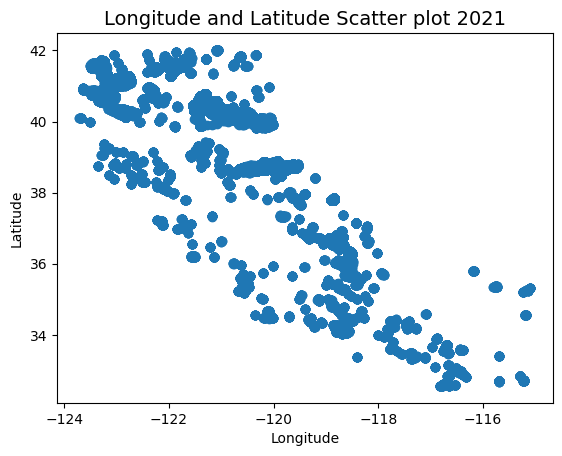

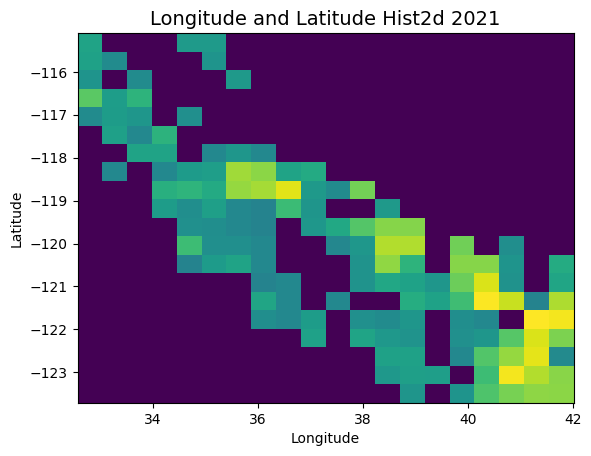

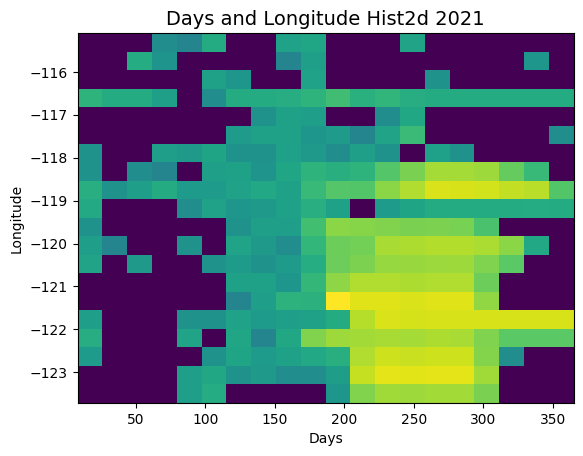

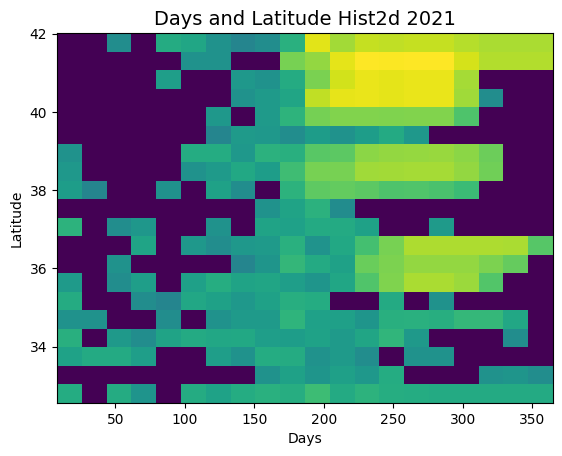

In [7]:
data = pd.read_csv('D:\\MastersAI\\Stevens\\AppliedMachineLearning\\CPE_695WS\\FinalProject\\SpatialData\\SpatialPolygonsIn2021Random.csv', header=0, delimiter=',')

dates = data['startDate']
days = []

for dateToConvert in dates:
    date_format= datetime.strptime(dateToConvert, '%Y-%m-%d').date()
    dateToAdd = date_format.timetuple().tm_yday
    days.append(dateToAdd)


lats = data['latitude']
lngs = data['longitude']

latMax = lats.max()
latMin = lats.min()
lngMax = lngs.max()
lngMin = lngs.min()

print(f'{latMin}:{latMax},{lngMin}:{lngMax}')

print(f'Number of Items: {len(lats)}')

print(data.head())

import matplotlib.colors as mcolors

plt.scatter(lngs, lats)
plt.title("Longitude and Latitude Scatter plot 2021", fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.hist2d(lats, lngs,bins=20, norm=mcolors.PowerNorm(0.1))
plt.title("Longitude and Latitude Hist2d 2021", fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.hist2d(days, lngs,bins=20, norm=mcolors.PowerNorm(0.1))
plt.title("Days and Longitude Hist2d 2021", fontsize=14)
plt.xlabel('Days')
plt.ylabel('Longitude')
plt.show()

plt.hist2d(days, lats,bins=20, norm=mcolors.PowerNorm(0.1))
plt.title("Days and Latitude Hist2d 2021", fontsize=14)
plt.xlabel('Days')
plt.ylabel('Latitude')
plt.show()

This python cell represents the mapping of all the parsed data and synthentic data that will be used for training and testing

In [9]:
import math
import time
import os.path
from datetime import datetime, date
import numpy as np
import pandas
import argparse


# load the fire incident 2021 for california state
def load_fire_ca_spatial():
    print('method start: load_fire_ca_spatial')
    fire_data = []
    #FIRE
    dataRead = pandas.read_csv('D:\\MastersAI\\Stevens\\AppliedMachineLearning\\CPE_695WS\\FinalProject\\SpatialData\\SpatialPolygonsIn2021Random.csv', header=0, delimiter=',')
    fire_data.append(dataRead)
    print('method End: load_fire_ca_spatial')
    return fire_data

def load_no_fire_ca_spatial():
    print('method start: load_fire_ca_spatial')
    fire_data = []
    #NO FIRE
    dataRead = pandas.read_csv('D:\\MastersAI\\Stevens\\AppliedMachineLearning\\CPE_695WS\\FinalProject\\SpatialData\\noFires2021SythenticData.csv', header=0, delimiter=',')
    fire_data.append(dataRead)

    print('method End: load_fire_ca_spatial')
    return fire_data

# grid creation for california state map
# Using the max limits of Latitudes and Longitudes will result in a square grid
# Grid zones are kept to 1 degree by 1 degree to encompass all parts of the state and locate weather stations
def create_grid(num_of_grids):
    grids = []
    grid_id = 0
    if num_of_grids > CALIFORNIA_MAX_NUMBER_OF_GRIDS:
        num_of_grids = CALIFORNIA_MAX_NUMBER_OF_GRIDS
    for i in range(num_of_grids):
        gridCell = CALIFORNIA_ONE_DEGREE_GRIDS[i]       
        grids.append(Grid(grid_id, gridCell[1], gridCell[0], gridCell[2], gridCell[3]))
        grid_id += 1
    return grids

def create_grid_from_grids(num_lat, num_long, constrained_grids):
    print('method start: create_grid_from_grids')
    grids = []
    id = 0
    for grid in constrained_grids:
        ca_max_lat = grid.max_lat
        ca_min_lat = grid.min_lat
        ca_max_long = grid.max_long
        ca_min_long = grid.min_long
        delta_lat = np.abs(ca_max_lat - ca_min_lat)/num_lat
        delta_long = (ca_max_long - ca_min_long)/num_long
        print(f'{ca_max_lat}:{ca_min_lat}:{ca_max_long}:{ca_min_long}')
        for i in range(num_lat):
            for j in range(num_long):
                grid_min_lat = ca_min_lat + i*delta_lat
                grid_max_lat = grid_min_lat + delta_lat
                grid_min_long = ca_min_long + j*delta_long
                grid_max_long = grid_min_long + delta_long
                grids.append(Grid(id, grid_min_lat, grid_max_lat, grid_min_long, grid_max_long))
                print(f'{id}:{grid_min_lat}:{grid_max_lat}:{grid_min_long}:{grid_max_long}')
                id += 1
    print('method end: create_grid_from_grids')
    return grids

# map weather stations to grid
def match_weather_station_to_grid(ca_grid, stations):
    grid_station = {}
    sts = pandas.read_excel(stations, header=0)
    sts = sts.drop([261])
    sts.iloc[:, 8] = pandas.to_datetime(sts.iloc[:, 8])
    sts = sts.loc[sts.iloc[:, 7] == ACTIVE]
    sts = sts.loc[sts.iloc[:, 8] < np.datetime64(START_DATE)]

    for g in ca_grid:
        for i in range(len(sts)):
            if g.min_lat <= sts.iloc[i, 4] < g.max_lat and g.min_long <= sts.iloc[i, 5] < g.max_long:
                if g.grid_id not in grid_station:
                    grid_station[g.grid_id] = [int(sts.iloc[i, 0])]
                else:
                    grid_station[g.grid_id].append(int(sts.iloc[i, 0]))
        if g.grid_id not in grid_station:
            c_lat = (g.max_lat + g.min_lat) / 2.0
            c_long = (g.max_long + g.min_long) / 2.0
            station_id = 0
            dist = 1e10
            for i in range(len(sts)):
                dist_tmp = math.sqrt((c_lat - sts.iloc[i, 4]) ** 2 + (c_long - sts.iloc[i, 5]) ** 2)
                if dist_tmp < dist:
                    dist = dist_tmp
                    station_id = sts.iloc[i, 0]
            grid_station[g.grid_id] = [int(station_id)]
    return grid_station

def extract_weather_2013(station, data_path):
    print('method start: extract_weather_2013(station, data_path)')
    station_id_string = str(station).zfill(3)
    file_name = os.path.join(data_path, "weather", f'dailyStns2013/2013daily{station_id_string}.csv')
    data = {}
    if os.path.isfile(file_name):
        lines = open(file_name, 'r').readlines()
        for line in lines:
            line = line.strip().split(',')
            line = [l.strip() for l in line]
            date_format = datetime.strptime(line[1], '%m/%d/%Y').date()
            data[date_format] = {}
            data[date_format]["solar_rad"] = float(line[4]) if (is_float(line[4])) else 0
            data[date_format]["soil_temp"] = float(line[6]) if (is_float(line[6])) else 0
            data[date_format]["max_air_temp"] = float(line[8]) if (is_float(line[8])) else 0
            data[date_format]["min_air_temp"] = float(line[10]) if (is_float(line[10])) else 0
            data[date_format]["aver_air_temp"] = float(line[12]) if (is_float(line[12])) else 0
            data[date_format]["aver_vapor_press"] = float(line[14]) if (is_float(line[14])) else 0
            data[date_format]["aver_wind_speed"] = float(line[16]) if (is_float(line[16])) else 0
            data[date_format]["precipitation"] = float(line[18]) if (is_float(line[18])) else 0
            data[date_format]["max_humidity"] = float(line[20]) if (is_float(line[20])) else 0
            data[date_format]["min_humidity"] = float(line[22]) if (is_float(line[22])) else 0
            data[date_format]["eto"] = float(line[24]) if (is_float(line[24])) else 0
            data[date_format]["aver_humidity"] = float(line[26]) if (is_float(line[26])) else 0
            data[date_format]["dew_point"] = float(line[28]) if (is_float(line[28])) else 0
            data[date_format]["wind_run"] = float(line[30]) if (is_float(line[30])) else 0
    print('method end: extract_weather_2013(station, data_path)')
    return data

def extract_weather(year, station, data_path):
    print('method start: extract_weather(year, station, data_path)')
    station_id_string = str(station).zfill(3)
    if year == "2016" or year == "2021":
        file_name = os.path.join(data_path, "weather", f'dailyStns{year}/daily{station_id_string}.csv')
    else:
        file_name = os.path.join(data_path, "weather", f'dailyStns{year}/{year}daily{station_id_string}.csv')
    data = {}
    if os.path.isfile(file_name):
        lines = open(file_name, 'r').readlines()
        for line in lines:
            line = line.strip().split(',')
            line = [l.strip() for l in line]
            date_format = datetime.strptime(line[1], '%m/%d/%Y').date()
            data[date_format] = {}
            data[date_format]["eto"] = float(line[3]) if (is_float(line[3])) else 0
            data[date_format]["precipitation"] = float(line[5]) if (is_float(line[5])) else 0
            data[date_format]["solar_rad"] = float(line[7]) if (is_float(line[7])) else 0
            data[date_format]["aver_vapor_press"] = float(line[9]) if (is_float(line[9])) else 0
            data[date_format]["max_air_temp"] = float(line[11]) if (is_float(line[11])) else 0
            data[date_format]["min_air_temp"] = float(line[13]) if (is_float(line[13])) else 0
            data[date_format]["aver_air_temp"] = float(line[15]) if (is_float(line[15])) else 0
            data[date_format]["max_humidity"] = float(line[17]) if (is_float(line[17])) else 0
            data[date_format]["min_humidity"] = float(line[19]) if (is_float(line[19])) else 0
            data[date_format]["aver_humidity"] = float(line[21]) if (is_float(line[21])) else 0
            data[date_format]["dew_point"] = float(line[23]) if (is_float(line[23])) else 0
            data[date_format]["aver_wind_speed"] = float(line[25]) if (is_float(line[25])) else 0
            data[date_format]["wind_run"] = float(line[27]) if (is_float(line[27])) else 0
            data[date_format]["soil_temp"] = float(line[29]) if (is_float(line[29])) else 0
    print('method end: extract_weather(year, station, data_path)')
    return data

# weather 2022 has folder for each month
def extract_weather_2022(station, data_path):
    print('method start: extract_weather_2022(station, data_path)')
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep']
    station_id_string = str(station).zfill(3)
    data = {}
    for m in months:
        file_name = os.path.join(data_path, "weather", f'dailyStns2022/dailyStns{m}/{m}daily{station_id_string}.csv')
        if os.path.isfile(file_name):
            lines = open(file_name, 'r').readlines()
            for line in lines:
                line = line.strip().split(',')
                line = [l.strip() for l in line]
                date_format = datetime.strptime(line[1], '%m/%d/%Y').date()
                data[date_format] = {}
                data[date_format]["eto"] = float(line[3]) if (is_float(line[3])) else 0
                data[date_format]["precipitation"] = float(line[5]) if (is_float(line[5])) else 0
                data[date_format]["solar_rad"] = float(line[7]) if (is_float(line[7])) else 0
                data[date_format]["aver_vapor_press"] = float(line[9]) if (is_float(line[9])) else 0
                data[date_format]["max_air_temp"] = float(line[11]) if (is_float(line[11])) else 0
                data[date_format]["min_air_temp"] = float(line[13]) if (is_float(line[13])) else 0
                data[date_format]["aver_air_temp"] = float(line[15]) if (is_float(line[15])) else 0
                data[date_format]["max_humidity"] = float(line[17]) if (is_float(line[17])) else 0
                data[date_format]["min_humidity"] = float(line[19]) if (is_float(line[19])) else 0
                data[date_format]["aver_humidity"] = float(line[21]) if (is_float(line[21])) else 0
                data[date_format]["dew_point"] = float(line[23]) if (is_float(line[23])) else 0
                data[date_format]["aver_wind_speed"] = float(line[25]) if (is_float(line[25])) else 0
                data[date_format]["wind_run"] = float(line[27]) if (is_float(line[27])) else 0
                data[date_format]["soil_temp"] = float(line[29]) if (is_float(line[29])) else 0
    print('method end: extract_weather_2022(station, data_path)')
    return data

def match_weather_to_fire_incident(ca_grid, fire_incidents, weather_grid, output_path, dates, isFire):
    print('method start: match_weather_to_fire_incident(ca_grid, fire_incidents)')

    header = ["grid", "day", "latitude", "longitude", "acres"] + WEATHER_FEATURE + [HAS_FIRE]
    header = ','.join(header)
    file_out = open(output_path, 'w')
    file_out.write(header + '\n')

    missingDates = []
    for d in dates:
        missingDates.append(d.timetuple().tm_yday)

    for incident in fire_incidents:
        for i in range(len(incident)):
            inc_lat = float(incident.iloc[i, 2])
            inc_long = float(incident.iloc[i, 3])
            start_date = incident.iloc[i, 0][0 : 10]
            date_format = datetime.strptime(start_date, '%Y-%m-%d').date()
            # end_date = incident.iloc[i, 1][0 : 10]
            arce_burn = incident.iloc[i, 4]

            dateToAdd = date_format.timetuple().tm_yday

            weather_feat = WEATHER_FEATURE
            numberOfGrids = len(ca_grid)
            for g in ca_grid:
                if g.min_lat <= inc_lat < g.max_lat and g.min_long <= inc_long < g.max_long:
                    weather_for_grid_location = weather_grid[g.grid_id][date_format]
                    
                    s = str(g.grid_id) + ',' + str(dateToAdd) + ',' + str(inc_lat) + ',' + str(inc_long) + ',' + str(arce_burn) + ','
                    for f in range(len(weather_feat)):
                        s += str(weather_for_grid_location[weather_feat[f]]) + ','
                    if isFire == True:    
                        #Has Fire = 1
                        s += str(1)
                    else:
                        # NO FIRE = 0
                        s += str(0)
                    file_out.write(s + '\n')
                    break

    file_out.close()

    print('method end: match_weather_to_fire_incident(ca_grid, fire_incidents)')


def training_data_to_file_with_spatial(num_of_grids, data_path, station_path, output_path):
    print('method start: training_data_to_file_with_spatial(num_of_grids, data_path, station_path, output_path)')
    start_dt = date(2021, 1, 1)
    end_dt = date(2021, 12, 31)

    dates = daterange(start_dt, end_dt)

    fires = load_fire_ca_spatial()
    largeGrid = create_grid(num_of_grids)
    grid = create_grid_from_grids(2, 2, largeGrid)
    station_grid = match_weather_station_to_grid(grid, station_path)
    grid_weather = {}

    len_valid_features = {}
    for g, s in station_grid.items():
        print(g, s)
        grid_weather[g] = {}
        len_valid_features[g] = {}
        #Force only 2021
        weather_first_sts = {}
        weather_first_sts.update(extract_weather(str(2021), s[0], data_path))

        for d in dates:
            if d in weather_first_sts:
                grid_weather[g][d] = weather_first_sts[d]
            else:
                grid_weather[g][d] = {}
                for f in WEATHER_FEATURE:
                    grid_weather[g][d][f] = 0
        for d in dates:
            len_valid_features[g][d] = {}
            for f in WEATHER_FEATURE:
                if grid_weather[g][d][f] != NAN:
                    len_valid_features[g][d][f] = 1
                else:
                    len_valid_features[g][d][f] = 0
        if len(s) > 1:
            for i in range(1, len(s)):
                tmp_weather = {}
                tmp_weather.update(extract_weather(str(2021), s[i], data_path))

                for d in dates:
                    for f in WEATHER_FEATURE:
                        if d in tmp_weather:
                            if grid_weather[g][d][f] != NAN and tmp_weather[d][f] != NAN:
                                grid_weather[g][d][f] += tmp_weather[d][f]
                                len_valid_features[g][d][f] += 1
                            elif grid_weather[g][d][f] == NAN and tmp_weather[d][f] != NAN:
                                grid_weather[g][d][f] = tmp_weather[d][f]
                                len_valid_features[g][d][f] += 1
                            else:
                                continue

            for d in dates:
                for f in WEATHER_FEATURE:
                    if len_valid_features[g][d][f] != 0 and grid_weather[g][d][f] != NAN:
                        grid_weather[g][d][f] /= len_valid_features[g][d][f]

    match_weather_to_fire_incident(grid, fires, grid_weather, output_path, dates, True)
    print('method end: training_data_to_file_with_spatial(num_of_grids, data_path, station_path, output_path)')

def training_data_to_file_with_spatial_no_fires(num_of_grids, data_path, station_path, output_path):
    print('method start: training_data_to_file_with_spatial(num_of_grids, data_path, station_path, output_path)')
    start_dt = date(2021, 1, 1)
    end_dt = date(2021, 12, 31)

    dates = daterange(start_dt, end_dt)

    fires = load_no_fire_ca_spatial()
    largeGrid = create_grid(num_of_grids)
    grid = create_grid_from_grids(2, 2, largeGrid)
    station_grid = match_weather_station_to_grid(grid, station_path)
    grid_weather = {}

    len_valid_features = {}
    for g, s in station_grid.items():
        print(g, s)
        grid_weather[g] = {}
        len_valid_features[g] = {}
        #Force only 2021
        weather_first_sts = {}
        weather_first_sts.update(extract_weather(str(2021), s[0], data_path))

        for d in dates:
            if d in weather_first_sts:
                grid_weather[g][d] = weather_first_sts[d]
            else:
                grid_weather[g][d] = {}
                for f in WEATHER_FEATURE:
                    grid_weather[g][d][f] = 0
        for d in dates:
            len_valid_features[g][d] = {}
            for f in WEATHER_FEATURE:
                if grid_weather[g][d][f] != NAN:
                    len_valid_features[g][d][f] = 1
                else:
                    len_valid_features[g][d][f] = 0
        if len(s) > 1:
            for i in range(1, len(s)):
                tmp_weather = {}
                tmp_weather.update(extract_weather(str(2021), s[i], data_path))

                for d in dates:
                    for f in WEATHER_FEATURE:
                        if d in tmp_weather:
                            if grid_weather[g][d][f] != NAN and tmp_weather[d][f] != NAN:
                                grid_weather[g][d][f] += tmp_weather[d][f]
                                len_valid_features[g][d][f] += 1
                            elif grid_weather[g][d][f] == NAN and tmp_weather[d][f] != NAN:
                                grid_weather[g][d][f] = tmp_weather[d][f]
                                len_valid_features[g][d][f] += 1
                            else:
                                continue

            for d in dates:
                for f in WEATHER_FEATURE:
                    if len_valid_features[g][d][f] != 0 and grid_weather[g][d][f] != NAN:
                        grid_weather[g][d][f] /= len_valid_features[g][d][f]

    match_weather_to_fire_incident(grid, fires, grid_weather, output_path, dates, False)
    print('method end: training_data_to_file_with_spatial(num_of_grids, data_path, station_path, output_path)')

timeStart = time.time()
training_data_to_file_with_spatial(CALIFORNIA_MAX_NUMBER_OF_GRIDS, 'D:\\MastersAI\\Stevens\\AppliedMachineLearning\\CPE_695WS\\FinalProject\\mainBranch\\wildfire\\data', 'D:\\MastersAI\Stevens\\AppliedMachineLearning\\CPE_695WS\FinalProject\\mainBranch\\wildfire\\data\\weather\\CIMISStationsList.xlsx', 'D:\\MastersAI\Stevens\\AppliedMachineLearning\\CPE_695WS\FinalProject\\mainBranch\\wildfire\\data\\training\\spatial_centers_and_polygons_2021_final.csv')
timeStop = time.time()
print(f'Data Extraction complete for fires, retrival took {(timeStop - timeStart)}')
timeStart = time.time()
training_data_to_file_with_spatial_no_fires(CALIFORNIA_MAX_NUMBER_OF_GRIDS, 'D:\\MastersAI\\Stevens\\AppliedMachineLearning\\CPE_695WS\\FinalProject\\mainBranch\\wildfire\\data', 'D:\\MastersAI\Stevens\\AppliedMachineLearning\\CPE_695WS\FinalProject\\mainBranch\\wildfire\\data\\weather\\CIMISStationsList.xlsx', 'D:\\MastersAI\Stevens\\AppliedMachineLearning\\CPE_695WS\FinalProject\\mainBranch\\wildfire\\data\\training\\spatial_polygon_no_Fires_2021_final.csv')
timeStop = time.time()
print(f'Data Extraction complete for no fires, retrival took {(timeStop - timeStart)}')




method start: training_data_to_file_with_spatial(num_of_grids, data_path, station_path, output_path)
method start: load_fire_ca_spatial
method End: load_fire_ca_spatial
method start: create_grid_from_grids
42:41:-125:-126
0:41.0:41.5:-126.0:-125.5
1:41.0:41.5:-125.5:-125.0
2:41.5:42.0:-126.0:-125.5
3:41.5:42.0:-125.5:-125.0
41:40:-125:-126
4:40.0:40.5:-126.0:-125.5
5:40.0:40.5:-125.5:-125.0
6:40.5:41.0:-126.0:-125.5
7:40.5:41.0:-125.5:-125.0
42:41:-124:-125
8:41.0:41.5:-125.0:-124.5
9:41.0:41.5:-124.5:-124.0
10:41.5:42.0:-125.0:-124.5
11:41.5:42.0:-124.5:-124.0
41:40:-124:-125
12:40.0:40.5:-125.0:-124.5
13:40.0:40.5:-124.5:-124.0
14:40.5:41.0:-125.0:-124.5
15:40.5:41.0:-124.5:-124.0
42:41:-123:-124
16:41.0:41.5:-124.0:-123.5
17:41.0:41.5:-123.5:-123.0
18:41.5:42.0:-124.0:-123.5
19:41.5:42.0:-123.5:-123.0
42:41:-120:-122
20:41.0:41.5:-122.0:-121.0
21:41.0:41.5:-121.0:-120.0
22:41.5:42.0:-122.0:-121.0
23:41.5:42.0:-121.0:-120.0
41:40:-123:-124
24:40.0:40.5:-124.0:-123.5
25:40.0:40.5:-123

The next section represents data generated for the year of 2021, from the GeoJson files and sythentically created data. The memory footprint was so large that was running into out of RAM exceptions that the full data set could not be utilized.  In addition need to round all data down to one decimal palce and recast the data types as float32 verse float64 due to memory restrictions. Also evaluated the data with and without fires to see if there was an even distributation of data.  In this case I don't need to upsample since the reverse is now true, I have so much fire data available and the no fire data can be just synthetically generating for each year outside each of the geospatial polygons.  

In [8]:
training_data_path = 'D:\\MastersAI\Stevens\\AppliedMachineLearning\\CPE_695WS\FinalProject\\mainBranch\\wildfire\\data\\training\\spatial_centers_and_polygons_2021_final.csv'
training_data_noFire_path = 'D:\\MastersAI\Stevens\\AppliedMachineLearning\\CPE_695WS\FinalProject\\mainBranch\\wildfire\\data\\training\\spatial_polygon_no_Fires_2021_final.csv'
#Round data to reduce size in memory, due to computer limitations, in addition need to reduce the memory footprint
# pandas loads data into ram, instead of transferring into GPU maxing out the limit on my machine, in addition to throwing errors within some of the python libraries utilized
data1 = pd.read_csv(training_data_path, header=0, delimiter=',').round(1).iloc[:200000,:]
data2 = pd.read_csv(training_data_noFire_path, header=0, delimiter=',').round(1)
# create multiple data frames to concatenate no fire and fire date frames
frames = [data1, data2]

data = pd.concat(frames)
#Header
#grid_id,startDate,endDate,latitude,longitude,acres,eto,precipitation,solar_rad,aver_vapor_press,max_air_temp,min_air_temp,aver_air_temp,max_humidity,min_humidity,aver_humidity,dew_point,aver_wind_speed,wind_run,soil_temp,has_fire
fullfeatures = data.drop('has_fire', axis=1)
# features are reduced to essential features, with the highest siginificance
# recast data type as float32 instead of float64 to reduce memory footprint
features = data[['day', 'latitude', 'longitude', 'wind_run', 'aver_wind_speed', 'soil_temp', 'aver_humidity','eto','max_humidity', 'dew_point']].astype(np.float32)

labels = data['has_fire']

output = labels.to_numpy()

print(f'sum:{np.sum(output)}, max:{np.max(output)}, percentage with fire:{(np.sum(output)/len(output))*100}%')

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.8, random_state=42)
# Check the distribution between the two outcomes (fire or no fire)
print(f'Train-sum:{np.sum(y_train)}, max:{np.max(y_train)}, percentage with fire:{(np.sum(y_train)/len(y_train))*100}%')
print(f'Test sum:{np.sum(y_test)}, max:{np.max(y_test)}, percentage with fire:{(np.sum(y_test)/len(y_test))*100}%')

sum:200000, max:1, percentage with fire:50.043162227421156%
Train-sum:40081, max:1, percentage with fire:50.14449963093168%
Test sum:159919, max:1, percentage with fire:50.01782787654352%


Originally, when the data was produced from the CSV, it was limited to only centerpoints and the data created to represent no fires largely outnumbered the fire locations, due to size of the grids.  The grids were originally 1 degree by 1 degree and the fire data was averaged within a zone, next each day was checked for a fire representing a large number of days without fire data.  Overall, there were only 3 percent of the data that represented fires for the 172,000 rows of data.  The first approach to handle this large difference was to use the following algorithm below. Afterwards, the way the data was parsed and generated was changed which led to massive amounts of data points that represented fires.

In [9]:
#==================================
#Upsample after splitting for training data only
#==================================
ada = ADASYN(random_state=42)
#smtom = SMOTETomek(random_state=42)
#This adds data back in
#X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)


#X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

#print(f'Train Upsampled ADASYN-sum:{np.sum(y_train_ada)}, max:{np.max(y_train_ada)}, percentage with fire:{(np.sum(y_train_ada)/len(y_train_ada))*100}%')
#print(f'Train Upsampled SMOTETomek-sum:{np.sum(y_train_smtom)}, max:{np.max(y_train_smtom)}, percentage with fire:{(np.sum(y_train_smtom)/len(y_train_smtom))*100}%')

#======================================
# keep variable names for functions below
#=======================================
y_train_original = y_train
X_train_original = X_train

# y_train = y_train_ada
# X_train =  X_train_ada

#UpSample to fix issue with 3Percent of data fire only
#https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

# fire = data[data['has_fire'] == 1]
# noFire  = data[data['has_fire'] == 0]
# print(fire.shape)
# print(noFire.shape)

# data_upsample = resample(fire,
#              replace=True,
#              n_samples=len(noFire),
#              random_state=42)

# data_upsampled = pd.concat([noFire, data_upsample])

# data_upsampled.groupby('has_fire').size().plot(kind='pie',
#                                        y = "has_fire",
#                                        label = "Fire",
#                                        autopct='%1.1f%%')

# data = data_upsampled

#===============================
# End of Upsampling of training data
#===============================

The data needs to be normalized between zero and one, to prevent a feature having a higher weight and bias while training.  Each feature is scaled by the mean and standard deviation.

In [10]:
scaler = StandardScaler()

#preprocess the data, everything needs to be between 0 and 1
# Y is already between 0 and 1, so no scaling/normalization is required

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_original = scaler.fit_transform(X_train_original)

Having so many different features lead to more complexity in the model, a different model beside MLP classifiers was used to determine feature significance, then the features were culled/dropped from the data set for training and testing.  The model used to determine feature significance was ExtraTreesClassifier.  Due to the high significance of the grid identifier, the grids were reduced in size and Latitude and Longitude were eventually used as well.  Each of the 68 one degree grids were split again into four quadrants to increase the weather accuracy when predicting.

ExtraTreesClassifier TP:146699, FP:20113, TN:139692, FN:13220
ExtraTreesClassifier accuracy for Fire 0.879427139534326
ExtraTreesClassifier accuracy for NoFire 0.9135450455163754
ExtraTreesClassifier accuracy 0.8957444545920856
Feature Importance of ExtraTreesClassifier: [0.13260056 0.29680305 0.18914072 0.02260481 0.02833731 0.04869181
 0.10793108 0.09374203 0.06015685 0.01999178]


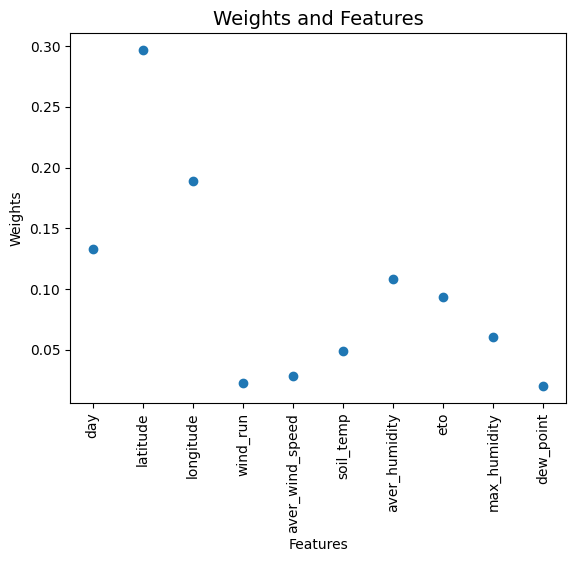

In [14]:
#==============================================
# ExtraTreesClassifier
#==============================================

extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42, max_depth = 40 ,max_leaf_nodes=40, n_jobs = 4 )
extra_trees_clf.fit(X_train, y_train)
predictions = extra_trees_clf.predict(X_test)

MLHelper.AccuracyPrediction(predictions, y_test, 'ExtraTreesClassifier')

print(f'Feature Importance of ExtraTreesClassifier: {extra_trees_clf.feature_importances_}')

# Ranking of feature importances
#0  0.29125618   grid_id (0 - 67) 1 degree by 1 degree grids
#1  0.21823714   date (2013-1-1 to 2022-9-30)  - Changed date to be days from start     
#14 0.07541789    Wind Run   (miles)   (km)
#13 0.05839433    Average Wind Speed   (mph)   (m/s)
#15 0.05795377    Average Soil Temperature   (°F)   (°C)
#11 0.03702782    Average Relative Humidity   (%)
#2  0.035404     Reference ETo   (in)   (mm)  
#9  0.03483106   Maximum Relative Humidity   (%)
#12 0.03229866    Dew Point   (°F)   (°C)
#6  0.02292333   Maximum Air Temperature   (°F)   (°C)
#7  0.027945     Minimum Air Temperature   (°F)   (°C)
#10 0.02512293    Minimum Relative Humidity   (%)
#8  0.02296461   Average Air Temperature   (°F)   (°C)
#5  0.02269498   Average Vapor Pressure   (mBars)   (kPa)
#3  0.02053239   Precipitation   (in)   (mm) 
#4  0.01699591   Solar Radiation Average   (Ly/day)   (W/m²)


#Final feature set
finalFeatureLables = ['day', 'latitude', 'longitude', 'wind_run', 'aver_wind_speed', 'soil_temp', 'aver_humidity','eto','max_humidity', 'dew_point']

plt.scatter(finalFeatureLables, extra_trees_clf.feature_importances_)
plt.title("Weights and Features", fontsize=14)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.xticks(rotation=135)
plt.show()

In [15]:
#==============================================
# MLPClassifier using Logistic, Relu, and Tanh activation functions
#==============================================
#class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *,
#  solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
#  power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
#  warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
#  validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)[source]
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
#==============================================

mlp_clf_logistic = MLPClassifier(hidden_layer_sizes=(125,), random_state=42, max_iter=1000, activation = 'logistic', learning_rate = 'constant', momentum = 0.9, solver = 'adam' )
mlp_clf_logistic.fit(X_train, y_train)
predictions = mlp_clf_logistic.predict(X_test)

MLHelper.AccuracyPrediction(predictions, y_test, 'MLPClassifier_logistic')
print(classification_report(y_test, predictions))

mlp_clf_relu = MLPClassifier(hidden_layer_sizes=(150,), random_state=42, max_iter=1000, activation = 'relu', learning_rate = 'constant', momentum = 0.9, solver = 'adam' )
mlp_clf_relu.fit(X_train, y_train)
predictions = mlp_clf_relu.predict(X_test)

MLHelper.AccuracyPrediction(predictions, y_test, 'MLPClassifier_relu')
print(classification_report(y_test, predictions))

#Results from GridSearchCV
#{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
mlp_clf_tanh = MLPClassifier(hidden_layer_sizes=(200, 100, 50), alpha = 0.0001, random_state=42, max_iter=1000, activation = 'tanh', learning_rate = 'constant', momentum = 0.9, solver = 'adam' )
# mlp_clf_tanh = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1000, activation = 'tanh', learning_rate = 'constant', momentum = 0.9, solver = 'adam' )
mlp_clf_tanh.fit(X_train, y_train)
predictions = mlp_clf_tanh.predict(X_test)

MLHelper.AccuracyPrediction(predictions, y_test, 'MLPClassifier_tanh')
print(classification_report(y_test, predictions))

mlp_clf_tanh = MLPClassifier(hidden_layer_sizes=(200, 100, 50), alpha = 0.0001, random_state=42, max_iter=1000, activation = 'tanh', learning_rate = 'constant', momentum = 0.9, solver = 'adam' )
# mlp_clf_tanh = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1000, activation = 'tanh', learning_rate = 'constant', momentum = 0.9, solver = 'adam' )
mlp_clf_tanh.fit(X_train, y_train)
predictions = mlp_clf_tanh.predict(X_train_original)

#Originally the training data was upsampled, so the accuracy was compared between the different techniques for creating synthentic data
MLHelper.AccuracyPrediction(predictions, y_train_original, 'MLPClassifier_tanh not upsampled')
print(classification_report(y_train_original, predictions))

MLPClassifier_logistic TP:159430, FP:3374, TN:156431, FN:489
MLPClassifier_logistic accuracy for Fire 0.9792756934719049
MLPClassifier_logistic accuracy for NoFire 0.9968837624267143
MLPClassifier_logistic accuracy 0.987917704019717
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    159805
           1       0.98      1.00      0.99    159919

    accuracy                           0.99    319724
   macro avg       0.99      0.99      0.99    319724
weighted avg       0.99      0.99      0.99    319724

MLPClassifier_relu TP:159447, FP:4135, TN:155670, FN:472
MLPClassifier_relu accuracy for Fire 0.9747221576946119
MLPClassifier_relu accuracy for NoFire 0.9969771105788321
MLPClassifier_relu accuracy 0.9855906969761419
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    159805
           1       0.97      1.00      0.99    159919

    accuracy                           0.99    319724
   m

Create MLP Classifier models and hypertuning used. GridSearchCV was used to determine the hidden layer sizes, max iterations, solver to use.

In [ ]:
#==============================================
# GridSearchCV Hypertuning
#==============================================

#hyper tuning this one is very computational intensive and takes hours to run and complete
# param_grid = {
#     'hidden_layer_sizes': [(200,100,50), (50,25,15), (150,75,30)],
#     'max_iter': [100, 200, 300],
#     'activation': ['tanh', 'relu', 'logistic'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

param_grid = {
    'hidden_layer_sizes': [(200,100,50), (50,25,15), (150,75,30), (27,18,9)],
    'max_iter': [200, 500, 1000],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
}

# grid = GridSearchCV(mlp_clf_tanh, param_grid, n_jobs= 4, cv=5)
# grid.fit(X_train, y_train)
# print(grid.best_params_) 

#{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}

#grid = RandomizedSearchCV(mlp_clf_tanh, param_distributions=param_grid, n_iter=20, n_jobs=4)

Compare the different MLP Classifiers and the ExtraTreesClassifier, then score each one accordingly

In [17]:
#Score all the estimators used and compare
estimators = [mlp_clf_logistic, extra_trees_clf, mlp_clf_relu, mlp_clf_tanh]
print('MLPClassifier_logistic', 'ExtraTreesClassifier', 'MLPClassifier_Relu', 'MLPClassifier_tanh')
print([estimator.score(X_test, y_test) for estimator in estimators])

#========================================================
# VotingClassifier using ensemble
#=======================================================

named_estimators = [
    ("ExtraTreesClassifier", extra_trees_clf),
    ("MLPClassifier_logistic", mlp_clf_logistic),
    ("MLPClassifier_Relu", mlp_clf_relu),
    ("MLPClassifier_tanh", mlp_clf_tanh),
]

# Compare the weights between the models
# print('MLPClassifier_logistic weights')
# print(mlp_clf_logistic.coefs_)
# print('MLPClassifier_Relu weights')
# print(mlp_clf_relu.coefs_)
# print('MLPClassifier_tanh weights')
# print(mlp_clf_tanh.coefs_)

# for i in range(len(mlp_clf_relu.coefs_)):
#     number_neurons_in_layer = mlp_clf_relu.coefs_[i].shape[1]
#     for j in range(number_neurons_in_layer):
#         weights = mlp_clf_relu.coefs_[i][:,j]
#         print(i, j, weights, end=", ")
#         print()
#     print()

voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)
predictions = voting_clf.predict(X_test)
MLHelper.AccuracyPrediction(predictions, y_test, 'VotingClassifier')
print(classification_report(y_test, predictions))

print(voting_clf.score(X_test, y_test))

MLPClassifier_logistic ExtraTreesClassifier MLPClassifier_Relu MLPClassifier_tanh
[0.987917704019717, 0.8957444545920856, 0.9855906969761419, 0.9968285145938371]
VotingClassifier TP:159468, FP:2195, TN:157610, FN:451
VotingClassifier accuracy for Fire 0.9864223724661797
VotingClassifier accuracy for NoFire 0.9971466712218701
VotingClassifier accuracy 0.9917241120466402
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    159805
           1       0.99      1.00      0.99    159919

    accuracy                           0.99    319724
   macro avg       0.99      0.99      0.99    319724
weighted avg       0.99      0.99      0.99    319724

0.9917241120466402


Plot the loss curves and confusion matrices for each of the MLP Classifiers

d:\PythonInstall\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


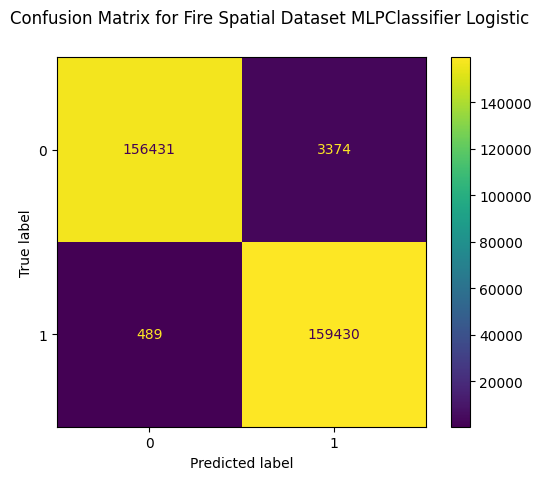

d:\PythonInstall\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


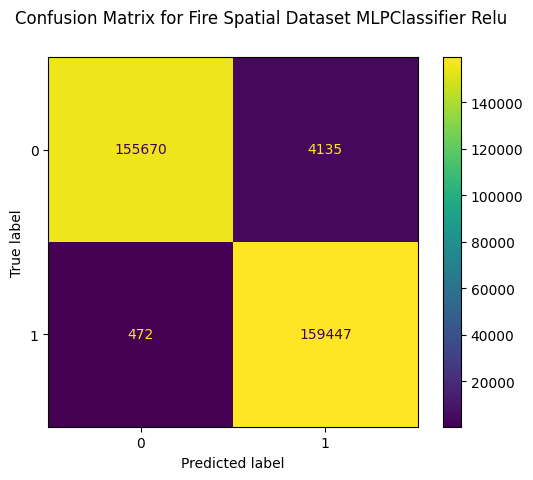

d:\PythonInstall\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


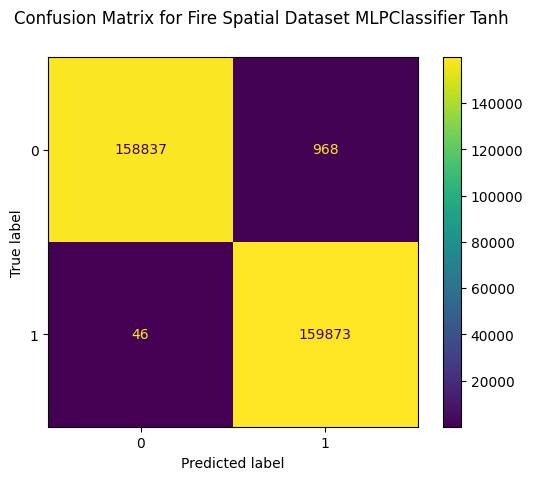

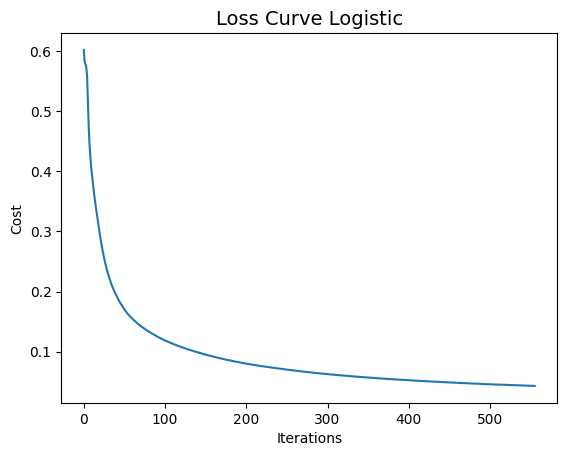

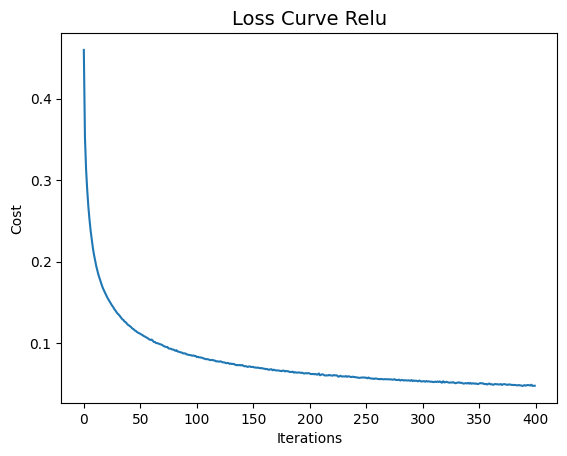

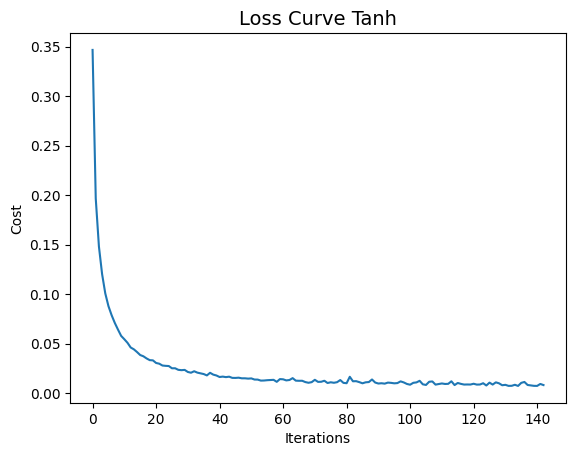

In [18]:
#========================================================
# Plotting confusion matrices and loss curve
#=======================================================

fig = plot_confusion_matrix(mlp_clf_logistic, X_test, y_test, display_labels=mlp_clf_logistic.classes_)
fig.figure_.suptitle("Confusion Matrix for Fire Spatial Dataset MLPClassifier Logistic")
plt.show()

fig = plot_confusion_matrix(mlp_clf_relu, X_test, y_test, display_labels=mlp_clf_relu.classes_)
fig.figure_.suptitle("Confusion Matrix for Fire Spatial Dataset MLPClassifier Relu")
plt.show()

fig = plot_confusion_matrix(mlp_clf_tanh, X_test, y_test, display_labels=mlp_clf_tanh.classes_)
fig.figure_.suptitle("Confusion Matrix for Fire Spatial Dataset MLPClassifier Tanh")
plt.show()

plt.plot(mlp_clf_logistic.loss_curve_)
plt.title("Loss Curve Logistic", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

plt.plot(mlp_clf_relu.loss_curve_)
plt.title("Loss Curve Relu", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

plt.plot(mlp_clf_tanh.loss_curve_)
plt.title("Loss Curve Tanh", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Looking the curves between the different activation functions used the Hyperbolic tangent converged within the smallest number of iterations, but fluctuates as it tries to converge.  The MLP using ReLU and Logistic activation functions took almost 4 times as many interations to converge, but do not have large oscillations when converging unlike the hyperbolic tangent.